## Neutron Star Mergers project

## Overview
**Notebook Author:** Topollo Naketsana (University of the Western Cape)<br>

**Paper:** [here]()

### Background:


In [319]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import interp1d, PchipInterpolator
from scipy.integrate import solve_ivp

In [320]:
# load data
data = pd.read_csv('../data/Parametrized_data.dat')

In [321]:
data

,m1_source_frame_Msun,m2_source_frame_Msun,Lambda1,Lambda2,Radius1_km,Radius2_km
0,1.637296,1.140765,66.373870,723.523060,10.887391,11.097352
1,1.612825,1.156845,191.207304,1335.339873,12.402063,12.349246
2,1.563015,1.191614,200.526550,1156.272842,12.285450,12.501216
3,1.625307,1.148567,134.833116,1439.597356,12.141489,12.627265
4,1.625909,1.148243,177.099466,1428.281697,12.399686,12.426146
...,...,...,...,...,...,...
2391,1.456157,1.275411,271.138172,593.167994,11.771023,11.732749
2392,1.363036,1.361102,275.144868,277.559025,11.146219,11.146212
2393,1.547311,1.202998,308.382837,1352.958123,12.800400,12.770993
2394,1.379074,1.345569,253.244553,293.279550,11.077769,11.070750


In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396 entries, 0 to 2395
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   m1_source_frame_Msun  2396 non-null   float64
 1   m2_source_frame_Msun  2396 non-null   float64
 2   Lambda1               2396 non-null   float64
 3   Lambda2               2396 non-null   float64
 4   Radius1_km            2396 non-null   float64
 5   Radius2_km            2396 non-null   float64
dtypes: float64(6)
memory usage: 112.4 KB


In [323]:
# shape
data.shape

(2396, 6)

In [325]:
# the missing values
data.isna().mean()

m1_source_frame_Msun    0.0
m2_source_frame_Msun    0.0
Lambda1                 0.0
Lambda2                 0.0
Radius1_km              0.0
Radius2_km              0.0
dtype: float64

In [326]:
# define m1 and m2 as well as their radii
M1 = data['m1_source_frame_Msun']
M2 = data['m2_source_frame_Msun']

# radii
R1 = data['Radius1_km']
R2 = data['Radius2_km']

In [327]:
M1

0       1.637296
1       1.612825
2       1.563015
3       1.625307
4       1.625909
          ...   
2391    1.456157
2392    1.363036
2393    1.547311
2394    1.379074
2395    1.431397
Name: m1_source_frame_Msun, Length: 2396, dtype: float64

Text(0.5, 0, 'Mass (solar masses)')

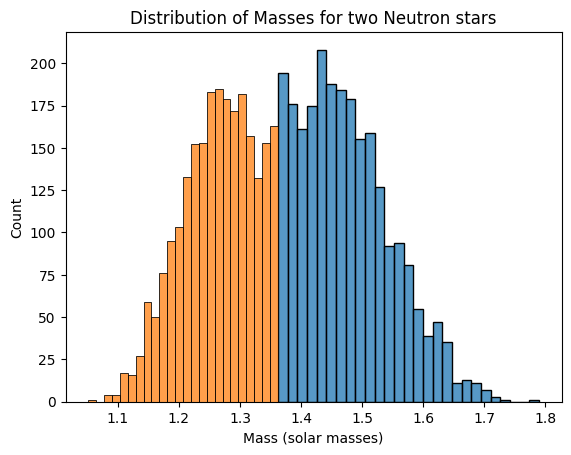

In [328]:
# plot the distribution of massess
sns.histplot(M1)
sns.histplot(M2)

plt.title('Distribution of Masses for two Neutron stars')
plt.xlabel('Mass (solar masses)')

Text(0.5, 0, 'Radius (km)')

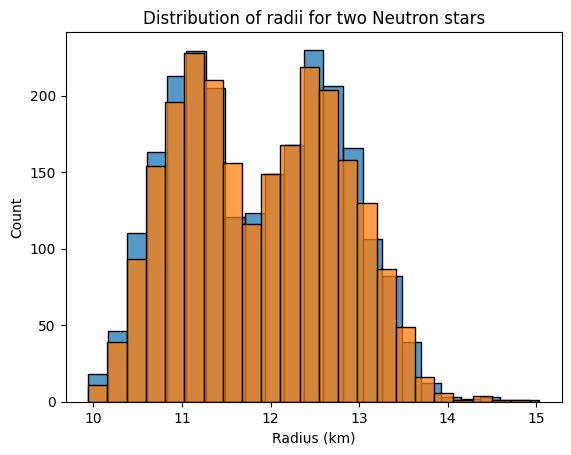

In [329]:
# plot the distribution of radii
sns.histplot(R1)
sns.histplot(R2)

plt.title('Distribution of radii for two Neutron stars')
plt.xlabel('Radius (km)')

## Background

### Orbital Frequency vs Mass and Radius

The orbital frequency \( f \) of a binary neutron star system can be related to the total mass \( M = M_1 + M_2 \) and the orbital separation \( r \) as:

$$
f = \frac{1}{2\pi} \sqrt{ \frac{G M}{r^3} }
$$

This equation is derived from Kepler's third law and Newtonian gravity, assuming a circular orbit. It allows us to explore how frequency changes with varying mass and orbital radius, as shown in the following plot.


In [330]:
M_total = (M1+M2)

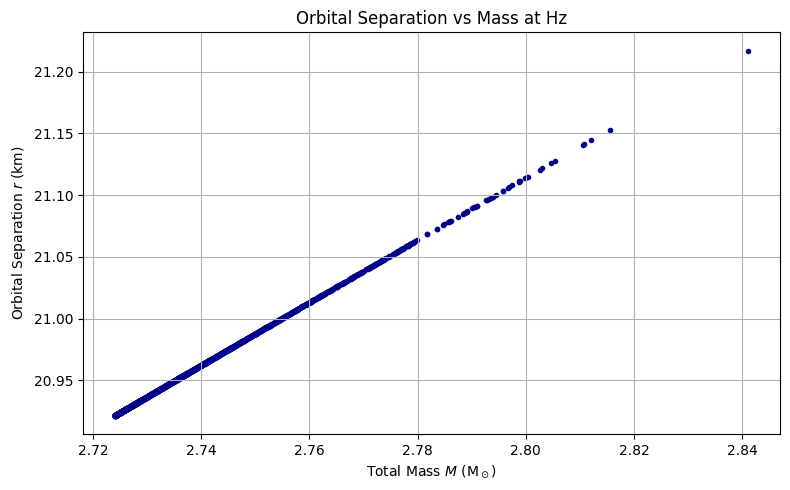

In [331]:
# variables
f = 1000
G = 6.67430e-11
c = 3e8
M_sun = 1.98847e30
M_total = M1+M2
R_km = 1e3

# function
separation_r = lambda M_total, f: (
    (G * (M_total*M_sun) / (2 * np.pi * f)**2) ** (1/3) / R_km)

r_km = separation_r(M_total, f)              
#print(f'Separation = {r_km} km')


# Compute separations
#r_range = np.array([separation_r(M, f) for M in M_range])

# Plotting
plt.figure(figsize= (8, 5))
plt.scatter(M_total, r_km, color= 'darkblue', marker= '.')
plt.title(f"Orbital Separation vs Mass at Hz")
plt.xlabel("Total Mass $M$ (M$_\\odot$)")
plt.ylabel("Orbital Separation $r$ (km)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Mass - Radius relation

In [417]:
'''# theoretical curve 
def theoretical_mass_radius(r):
    return 2.0 - 0.1 * (r - 10)**2  

r_theory = np.linspace(8, 12, 100)
m_theory = theoretical_mass_radius(r_theory)

plt.plot(r_theory, m_theory, '--', label='Theoretical Model')
plt.legend()'''

"# theoretical curve \ndef theoretical_mass_radius(r):\n    return 2.0 - 0.1 * (r - 10)**2  \n\nr_theory = np.linspace(8, 12, 100)\nm_theory = theoretical_mass_radius(r_theory)\n\nplt.plot(r_theory, m_theory, '--', label='Theoretical Model')\nplt.legend()"

### Equation of State (EoS) + General relativity  =>  TOV

We assume a **polytropic equation of state**:

$
P = K \rho^\gamma
$

where:
- P  is the pressure
- $\rho$  is the energy density
- \( K \) is the polytropic constant
- \( $\gamma$ \) is the adiabatic index (e.g. \( $\gamma$ = 2 \))


### TOV with a Realistic Equation of State

Steps:

1.  Load EoS (columns: ρ [kg m⁻³], P [Pa]).
2.  Create interpolating functions  P(ρ)  and  ρ(P).
3.  Integrate the TOV ODEs,    
      $\frac{dm}{dr}=4\pi r^{2}\rho,\qquad$
    .
                          
4.  Stop when $P\to0$ to obtain the stellar radius \(R\).
5.  Repeat for many ρ\(_c\) to obtain the M–R curve.



In [418]:
# columns  rho[kg/m^3], P[Pa]
path = '../data/Pressure_density_credible_levels.dat'
df = pd.read_csv(path)

df

,log_density_cgs,log_pressure_5pc_cgs,log_pressure_25pc_cgs,log_pressure_75pc_cgs,log_pressure_95pc_cgs
0,14.0000,32.561779,32.562330,32.563101,32.563390
1,14.0152,32.587335,32.587378,32.587511,32.587637
2,14.0303,32.611438,32.611899,32.613190,32.614130
3,14.0455,32.635921,32.636741,32.639004,32.640570
4,14.0606,32.661113,32.662041,32.664467,32.666057
...,...,...,...,...,...
95,15.4394,36.124063,36.370507,36.587263,36.745616
96,15.4545,36.144654,36.399896,36.624444,36.781883
97,15.4697,36.164036,36.427712,36.659637,36.816517
98,15.4848,36.184599,36.455837,36.696234,36.853259


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   log_density_cgs        100 non-null    float64
 1   log_pressure_5pc_cgs   100 non-null    float64
 2   log_pressure_25pc_cgs  100 non-null    float64
 3   log_pressure_75pc_cgs  100 non-null    float64
 4   log_pressure_95pc_cgs  100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


In [335]:
print("df shape :", df.shape)                

df shape : (100, 5)


#####

In [402]:
# constants
G = 6.67430e-11
c = 299792458.0
M_sun = 1.98847e30
km = 1e3

In [403]:
# log10 values
rho_log = df['log_density_cgs'].values        # kg m^-3
P_log   = df['log_pressure_5pc_cgs'].values          # Pa

# convert to linear
rho_si = 10**rho_log * 1e3      #  kg m^-3
P_si  = 10**P_log  * 0.1       # Pa

In [404]:
# Make sure arrays are sorted by density (ascending)
order = np.argsort(rho_si)
rho_si = rho_si[order]
P_si   = P_si[order]

In [337]:
print("unique ρ :", np.unique(rho_log)[:5], "...")  
print("unique P :", np.unique(P_log)[:5], "...")

unique ρ : [14.     14.0152 14.0303 14.0455 14.0606] ...
unique P : [32.561779 32.587335 32.611438 32.635921 32.661113] ...


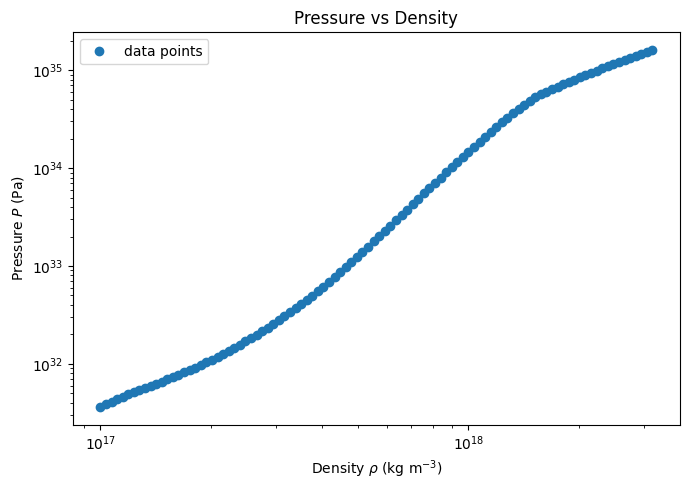

In [357]:
plt.figure(figsize=(7,5))
plt.loglog(rho_si, P_si, 'o', label= 'data points')
plt.xlabel(r'Density $\rho$ (kg m$^{-3}$)')
plt.ylabel(r'Pressure $P$ (Pa)')
plt.title('Pressure vs Density')

plt.legend()
plt.tight_layout()
plt.show()

In [405]:
# Interpolators (rho) and rho(P)
P_of_rho = PchipInterpolator(rho_si, P_si, extrapolate=False)
rho_of_P = PchipInterpolator(P_si,  rho_si, extrapolate=False)

In [372]:
'''P_hi = 10**df['log_pressure_95pc_cgs'] * 0.1
P_lo = 10**df['log_pressure_5pc_cgs']  * 0.1
plt.fill_between(rho, P_lo, P_hi, alpha=0.2, label='5–95 % band')'''

"P_hi = 10**df['log_pressure_95pc_cgs'] * 0.1\nP_lo = 10**df['log_pressure_5pc_cgs']  * 0.1\nplt.fill_between(rho, P_lo, P_hi, alpha=0.2, label='5–95\u202f% band')"

In [406]:
def tov_rhs(r, y):
    P, m = y
    if P <= 0: return [0, 0]
    rho = rho_of_P(P)
    dPdr = -(rho*c**2 + P) * (G*m + 4*np.pi*r**3*P/c**2) / (r * (r - 2*G*m/c**2))
    dmdr = 4*np.pi*r**2*rho
    return [dPdr, dmdr]


In [407]:
def surface(r, y):
    return y[0]          # P = 0
surface.terminal  = True
surface.direction = -1

In [408]:
def integrate_star(rho_c):
    try:
        Pc = float(P_of_rho(rho_c))
    except ValueError:
        return np.nan, np.nan                  # ρ outside table

    r0 = 1e-4                                  # 0.1 mm
    m0 = 4/3 * np.pi * rho_c * r0**3           # analytic mass seed
    y0 = [Pc, m0]                              # P0 = Pc  (keeps P>0)

    sol = solve_ivp(
        tov_rhs, (r0, 5e7), y0,                # integrate to 10 000 km
        events=surface,
        method= 'Radau',                        # stiff solver
        rtol= 1e-6, atol= 1e-8,
        max_step= 50.0
    )
    if sol.t_events[0].size == 0:              # never reached P=0
        return np.nan, np.nan
    
    R = sol.t_events[0][0]
    M = sol.y[1, -1]
    return R/km, M/M_sun                       # km, solar masses

In [409]:
print("Final pressure (P):", sol.y[0, -1])

Final pressure (P): -1.3924360111198426e+35


In [376]:
rho_min, rho_max = rho_si.min(), rho_si.max()
central_rhos = np.logspace(np.log10(rho_min*1.05),
                           np.log10(rho_max*0.95), 30)

R_list, M_list = [], []
for rc in central_rhos:
    R, M = integrate_star(rc)
    if not np.isnan(R):
        R_list.append(R)
        M_list.append(M)

In [419]:
'''plt.figure(figsize=(8,5))
plt.plot(R_list, M_list, 'o-', color='darkblue')
plt.xlabel("Radius $R$ (km)")
plt.ylabel("Mass $M$ (M$_\\odot$)")
plt.title("Neutron‑Star M–R Curve (TOV)")
plt.grid(True)
plt.tight_layout()
plt.show()'''

'plt.figure(figsize=(8,5))\nplt.plot(R_list, M_list, \'o-\', color=\'darkblue\')\nplt.xlabel("Radius $R$ (km)")\nplt.ylabel("Mass $M$ (M$_\\odot$)")\nplt.title("Neutron‑Star M–R Curve (TOV)")\nplt.grid(True)\nplt.tight_layout()\nplt.show()'